# Independent Component Analysis

In this exercise, you will implement the FastICA algorithm, and apply it to model independent components of a distribution of image patches. The description of the fastICA method is given in the paper *"A. Hyvärinen and E. Oja. 2000. Independent component analysis: algorithms and applications"* linked from ISIS, and we frequently refer to sections and equations in that paper.

Three methods are provided for your convenience:

* **`utils.load()`** extracts a dataset of image patches from an collection of images (contained in the folder `images/` that can be extracted from the `images.zip` file). The method returns a list of RGB image patches of size $12 \times 12$, presented as a matrix of size $\# patches \times 432$. (Note that $12 \cdot 12 \cdot 3 = 432$).


* **`utils.scatterplot(...)`** produces a scatter plot from a two-dimensional data set. Each point in the scatter plot represents one image patch.


* **`utils.render(...)`** takes a matrix of size $\# patches \times 432$ as input and renders these patches in the IPython notebook.

## Demo code

A demo code that makes use of these three methods is given below. The code performs basic analysis such as loading the data, plotting correlations between neighboring pixels, or different color channels of the same pixel, and rendering some image patches.

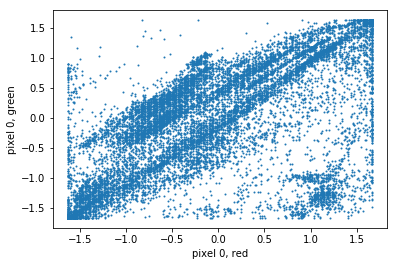

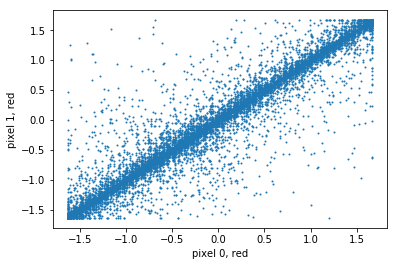

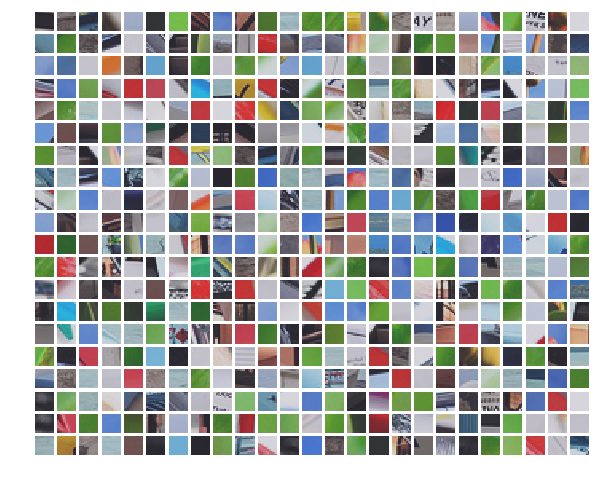

In [1]:
import utils
%matplotlib inline

# Load the dataset of image patches
X = utils.load()

# Plot the red vs. green channel of the first pixel
utils.scatterplot(X[:,0],X[:,1],xlabel='pixel 0, red',ylabel='pixel 0, green')

# Plot the red channel of the first and second pixel
utils.scatterplot(X[:,0],X[:,3],xlabel='pixel 0, red',ylabel='pixel 1, red')

# Visualize 500 image patches from the image
utils.render(X[:500])

## Whitening (10 P)

Independent component analysis applies whitening to the data as a preprocessing step. The whitened data matrix $\tilde X$ is obtained by linear projection of $X$, such data such that $\mathrm{E}[\tilde x \tilde x^\top] = I$, where $\tilde x$ is a row of the whitened matrix $\tilde X$. See Section 5.2 of the paper for a complete description of the whitening procedure.

**Tasks:**

* **Implement a function that returns a whitened version of the data given as input.**
* **Add to this function a test that makes sure that $\mathrm{E}[\tilde x \tilde x^\top] \approx I$ (up to numerical accuracy).**
* **Reproduce the scatter plots of the demo code, but this time, using the whitened data.**
* **Render 500 whitened image patches.**

average diff to identity:  1.3449109956703278e-12


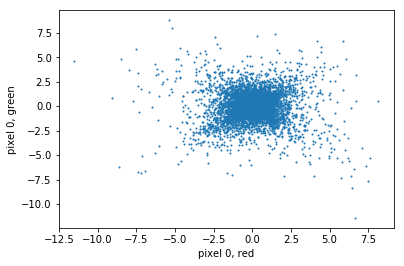

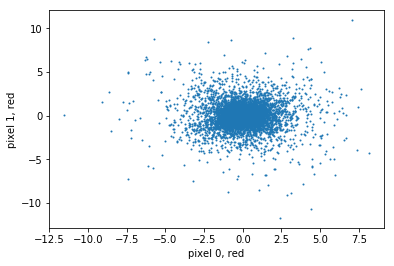

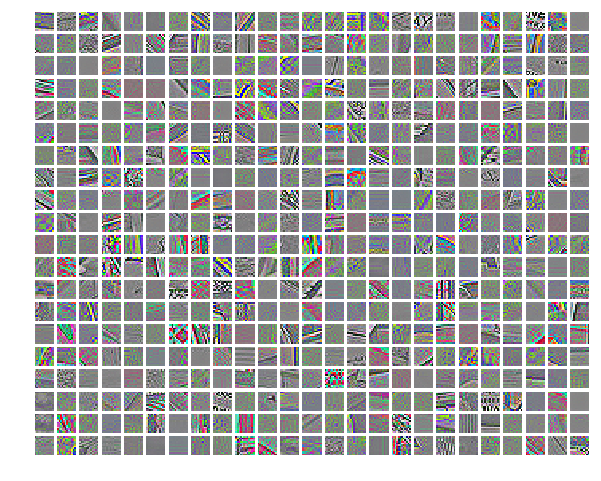

In [2]:
##### REPLACE BY YOUR CODE
import numpy as np
import scipy as sp
import scipy.cluster

def whiten(X):
    
    X = X.T # assuming input X has one row per sample instead of columns
    
    d = X.shape[0] # dimensions
    n = X.shape[1] # samples
    
    Eval, E = np.linalg.eigh(np.dot(X, X.T) / n)
    
    D = np.diag(np.reciprocal(np.sqrt(Eval)))
    
    X_white = E.dot(D).dot(E.T).dot(X)
    
    print ('average diff to identity: ', np.sum(np.absolute(np.dot(X_white, X_white.T) / n - np.eye(d))) / (d*d))
    
    return X_white.T

#####

whiteX = whiten(X)

# Plot the red vs. green channel of the first pixel
utils.scatterplot(whiteX[:,0],whiteX[:,1],xlabel='pixel 0, red',ylabel='pixel 0, green')

# Plot the red channel of the first and second pixel
utils.scatterplot(whiteX[:,0],whiteX[:,3],xlabel='pixel 0, red',ylabel='pixel 1, red')

# Visualize 500 image patches from the image
utils.render(whiteX[:500])

## Implementing FastICA (20 P)


We now would like to learn 100 independent components of the distribution of whitened image patches. For this, we follow the procedure described in the Chapter 6 of the paper. Implementation details specific to this exercise are given below:


* **Nonquadratic function G**: In this exercise, we will make use of the nonquadratic function $G(x) = \frac1a \log \cosh (a x)$, proposed in Section 4.3.2 of the paper, with $a=1.5$. This function admits as a derivative the function $g(x) = \tanh(a x)$, and as a double derivative the function $g'(x) = a \cdot (1-\tanh^2(a x))$.


* **Number of iterations**: The FastICA procedure will be run for 64 iterations. Note that the training procedure can take a relatively long time (up to 5 minutes depending on the system). Therefore, during the developement phase, it is advised to run the algorithm for a fraction of the total number of iterations.


* **Objective function**: The objective function that is maximized by the ICA training algorithm is given in Equation 25 of the paper. Note that since we learn 100 independent components, the objective function is in fact the *sum* of the objective functions of each independent components.


* **Finding multiple independent components**: Conceptually, finding multiple independent components as described in the paper is equivalent to running multiple instances of FastICA (one per independent component), under the constraint that the components learned by these instances are decorrelated. In order to keep the learning procedure computationally affordable, the code must be parallelized, in particular, make use of numpy matrix multiplications instead of loops whenever it is possible.


* **Weight decorrelation**: To decorrelate outputs, we use the inverse square root method given in Equation 45.


**Tasks:**

* **Implement the FastICA method described in the paper, and run it for 64 iterations.**

* **Print the value of the objective function at each iteration.**

* **Create a scatter plot of the projection of the whitened data on two distinct independent components after 0, 1, 3, 7, 15, 31, 63 iterations.**

* **Visualize the learned independent components using the function `render(...)`.**

average diff to identity:  1.3449109956703278e-12
it = 0  | J(W) = 49.30814276113865


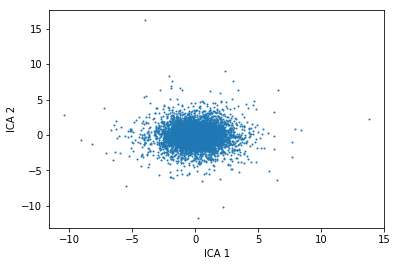

it = 1  | J(W) = 63.09613428233912


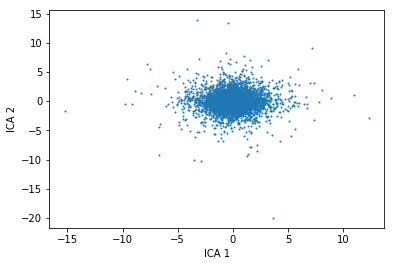

it = 2  | J(W) = 64.94976255335048
it = 3  | J(W) = 66.20968762538558


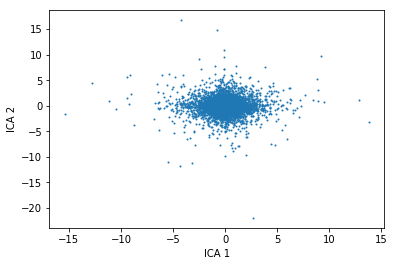

it = 4  | J(W) = 67.11981855805199
it = 5  | J(W) = 67.81972070622969
it = 6  | J(W) = 68.38461901314588
it = 7  | J(W) = 68.86212146243778


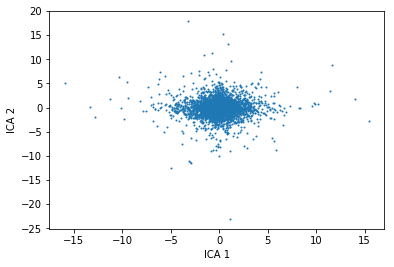

it = 8  | J(W) = 69.28241447273102
it = 9  | J(W) = 69.66695196885419
it = 10  | J(W) = 70.03098028305999
it = 11  | J(W) = 70.38381691696786
it = 12  | J(W) = 70.73048673623649
it = 13  | J(W) = 71.07185132515964
it = 14  | J(W) = 71.40587135009103
it = 15  | J(W) = 71.73166527760146


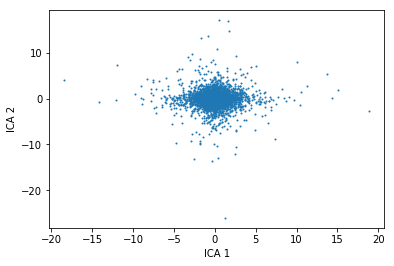

it = 16  | J(W) = 72.05000591695693
it = 17  | J(W) = 72.3616393671944
it = 18  | J(W) = 72.66528330123595
it = 19  | J(W) = 72.9575641849869
it = 20  | J(W) = 73.23420401236734
it = 21  | J(W) = 73.49243146621603
it = 22  | J(W) = 73.73439880383815
it = 23  | J(W) = 73.96304386265254
it = 24  | J(W) = 74.17989519944138
it = 25  | J(W) = 74.3850717304763
it = 26  | J(W) = 74.57880698902582
it = 27  | J(W) = 74.76198259762224
it = 28  | J(W) = 74.935837048661
it = 29  | J(W) = 75.10122034145373
it = 30  | J(W) = 75.25866529509202
it = 31  | J(W) = 75.40877409027202


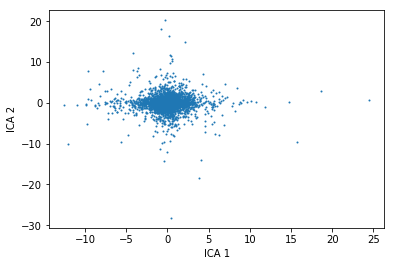

it = 32  | J(W) = 75.55184203483961
it = 33  | J(W) = 75.68803077444132
it = 34  | J(W) = 75.81752803718052
it = 35  | J(W) = 75.94054596098339
it = 36  | J(W) = 76.05702748365907
it = 37  | J(W) = 76.1666815518087
it = 38  | J(W) = 76.26919895257153
it = 39  | J(W) = 76.3643995779969
it = 40  | J(W) = 76.45211135449675
it = 41  | J(W) = 76.53241810304336
it = 42  | J(W) = 76.60573649286826
it = 43  | J(W) = 76.6729767996359
it = 44  | J(W) = 76.73544592393723
it = 45  | J(W) = 76.7942514704761
it = 46  | J(W) = 76.84999314634506
it = 47  | J(W) = 76.90313472260608
it = 48  | J(W) = 76.95404025759075
it = 49  | J(W) = 77.00283621066512
it = 50  | J(W) = 77.04960406487766
it = 51  | J(W) = 77.09436397450644
it = 52  | J(W) = 77.13719861963946
it = 53  | J(W) = 77.1782638728903
it = 54  | J(W) = 77.21780994006171
it = 55  | J(W) = 77.25591098838818
it = 56  | J(W) = 77.29257622461986
it = 57  | J(W) = 77.32779786806952
it = 58  | J(W) = 77.36162476342113
it = 59  | J(W) = 77.394173192431

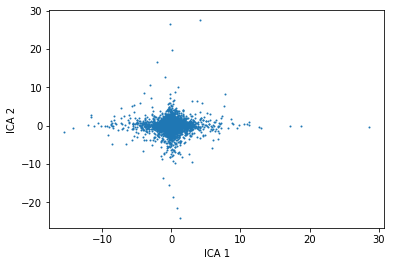

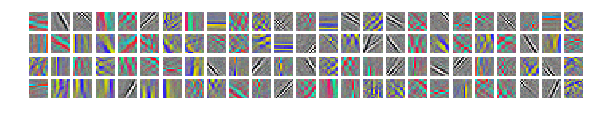

In [28]:
##### REPLACE BY YOUR CODE

def G(X, a):
    
    return (1 / a) * np.log(np.cosh(a * X))
    

def J(Y, a): # Y is a vector
    
    v = np.zeros(Y.shape)
    
    return np.square(G(Y, a) - G(v, a))

def g1(X, a):
    
    return np.tanh(a * X)
    
def g2(X, a):
    
    return a * (1 - np.square(g1(X, a)))
    

def fastICA(X, iterations = 64, C = 100, a = 1.5):
    
    # C = number of components
    
    X = X.T # rearrange X ..

    N = X.shape[1]
    d = X.shape[0]
    
    # one weight vector for each component (and for each dimension ??)
    W = np.random.rand(C, d)
    
    for k in range(iterations):

        # compute non-quadratics
        g1 = np.tanh(a * W.dot(X))
        g2 = a * (1 - np.square(g1)) 
        
        # compute new weights
        W = (1 / N) * (X.dot(g1.T).T - g2.dot(np.ones(N))[:, np.newaxis] * W)
        W /= np.linalg.norm(W, axis = 1)[:, np.newaxis]

        print ("it =", k ," | J(W) =", np.mean(np.sum(J(W.dot(X), a), axis = 0)))
        
        # decorrelate weights:
        Eval, F = np.linalg.eig(W.dot(W.T))
        
        D = np.diag(np.reciprocal(np.sqrt(Eval)))
        
        W = F.dot(D).dot(F.T).dot(W)
        
        if k in [0, 1, 3, 7, 15, 31, 63]:
            utils.scatterplot(W[0, :].dot(X),W[10, :].dot(X),xlabel='ICA 1',ylabel='ICA 2')
    
    return W

#####

W = fastICA(whiten(X), iterations = 64)

utils.render (W)
